In [ ]:
"""
  Name: Hussain Fazal
  Date: 05/10/2020
  
  File Name: Music Genre Classification

  Description: This file is used to analyse and predict music genre.
  Requirements: Change the dataset destination in "data" variable initialisation.
"""

In [ ]:
# Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Tools for analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the dataset into pandas data frame
path_data = "/Dataset/music.csv"
data = pd.read_csv(path_data, header=None)

# Seprating the metadata and the labels (which is the last column)
metadata_pd = data.iloc[:,1:]
label_pd = data.iloc[:,0]

# Converting the datatypes to numpy
metadata = metadata_pd.to_numpy()
label = label_pd.to_numpy()

#Standardizing the dataset
standardized_metadata = StandardScaler().fit_transform(metadata)

In [ ]:
# Function used for cross validation.
def cross_val(clf, K, metadata, label, title, return_clf = False):
    # scores is used to give average of accuracy
    scores = []
    cv = KFold(n_splits=K)
    
    # K fold analysis, used for spliting the data into k batches
    for train_index, test_index in cv.split(metadata):
      
        X_train, y_train = metadata[train_index], label[train_index]
        X_test, y_test = metadata[test_index], label[test_index]

        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    
    # Display the average score
    print(title + " Cross-Validation Accuracy Score: ", round(np.mean(scores), 2))
    
    # returns the classifier if needed
    if(return_clf == True):
        return clf

# Function used for parameter tuning.
def parameter_tuning(clf, metadata, label, param_grid):
  # Initialising grid search
  grid = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      scoring='accuracy',
                      verbose=2,
                      cv = 2,
                      n_jobs=-1
                      )
  
  # Inputing the data onto the grid search
  grid_result = grid.fit(metadata, label)

  # Displaying the best score with its corrsponding parameters
  print('Best Score: ', grid_result.best_score_)
  print('Best Params: ', grid_result.best_params_)

# Function used for displaying confusion matrix.
def display_confusionMatrix(clf, X, y, title):
  cm = confusion_matrix(y, clf.predict(X), labels=clf.classes_)
  normed_c = (cm.T / cm.astype(np.float).sum(axis=1)).T
  disp = ConfusionMatrixDisplay(confusion_matrix=normed_c,
                                display_labels=clf.classes_)
  disp.plot(
      cmap=plt.cm.Blues
      )
  disp.ax_.set_title(title + " Confusion Matrix:")

In [ ]:
# Different types of classifiers. 
#------------------------------------------------------------------------------#
# Classifier Random Forest
classifier_rf = RandomForestClassifier()
title_rf = "Random Forest"

#------------------------------------------------------------------------------#
# Classifier Decision Tree
classifier_dt = DecisionTreeClassifier()
title_dt = "Decision Tree"

#------------------------------------------------------------------------------#
# Classifier Support Vector Machine with Kernal as 'rbf' (SVC)
classifier_svc = SVC(max_iter=-1)
title_svc = "Support Vector Machine"

#------------------------------------------------------------------------------#
# Classifier K-Nearest Neighbors (KN)
classifier_kn = KNeighborsClassifier(70)
title_kn = "K-Nearest Neighbors"

#------------------------------------------------------------------------------#
# Classifier Naive Bayes (NB)
classifier_nb = GaussianNB()
title_nb = "Naive Bayes"

#------------------------------------------------------------------------------#
# Classifier Multi-Layer-Perceptron (MLP)
classifier_mlp = MLPClassifier(
    hidden_layer_sizes=100
    , activation="logistic"
    , solver="sgd"
    , max_iter=1000
    )
title_mlp = "Multi-Layer-Perceptron"

#------------------------------------------------------------------------------#
# List of classifiers
classifiers = [
               classifier_dt
               , classifier_kn
               , classifier_mlp
               , classifier_nb
               , classifier_rf
               , classifier_svc
]

# List of titles
titles = [
          title_dt
          , title_kn
          , title_mlp
          , title_nb
          , title_rf
          , title_svc
]

<Figure size 432x288 with 0 Axes>

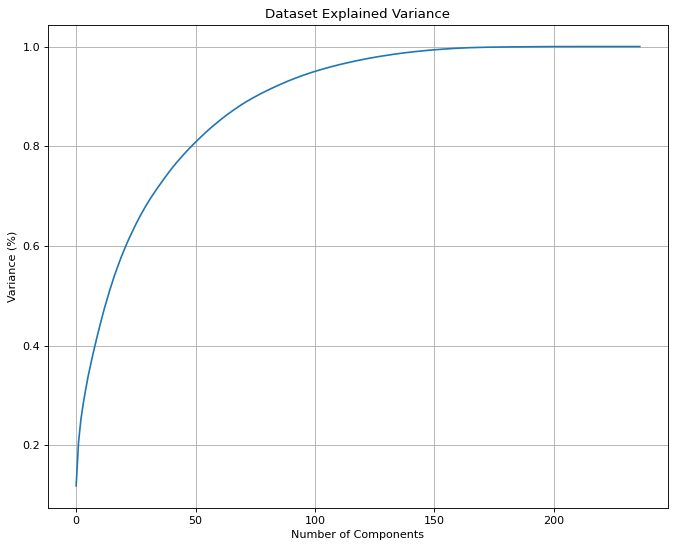

In [ ]:
#Fitting the PCA algorithm with the Data
pca = PCA().fit(standardized_metadata)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.grid()
plt.show()

In [ ]:
# Using 70 number of components for dataset
# which is indicated from the above graph.

# Fitting the standardised data with 70 number of components
pca = PCA(n_components = 70)
pca_metadata = pca.fit_transform(standardized_metadata)

In [ ]:
# Splitting the reduced dataset using pca
# into training and testing dataset.
X_train, X_test, y_train, y_test = train_test_split(
      pca_metadata 
      , label 
      , test_size=0.3
      , random_state=42
      , shuffle=True
      )

In [ ]:
# Fitting training data on-to the classifiers
for clf, title in zip(classifiers, titles):
  clf.fit(X_train, y_train)
  print(title + " Accuracy Score:", round(clf.score(X_test, y_test), 2))

Decision Tree Accuracy Score: 0.61
K-Nearest Neighbors Accuracy Score: 0.71
Multi-Layer-Perceptron Accuracy Score: 0.8
Naive Bayes Accuracy Score: 0.57
Random Forest Accuracy Score: 0.74
Support Vector Machine Accuracy Score: 0.8


In [ ]:
# Fitting data on-to the classifiers using cross-validation
for clf, title in zip(classifiers, titles):
  cross_val(clf, 5, pca_metadata, label, title, return_clf = False)

Decision Tree Cross-Validation Accuracy Score:  0.57
K-Nearest Neighbors Cross-Validation Accuracy Score:  0.69
Multi-Layer-Perceptron Cross-Validation Accuracy Score:  0.76
Naive Bayes Cross-Validation Accuracy Score:  0.53
Random Forest Cross-Validation Accuracy Score:  0.7
Support Vector Machine Cross-Validation Accuracy Score:  0.76


In [ ]:
# Classification reports of the best classifiers

# MLP
print(title_mlp + " Classification Report:")
print(classification_report(y_test, classifier_mlp.predict(X_test)))

# SVC
print(title_svc + " Classification Report:")
print(classification_report(y_test, classifier_svc.predict(X_test)))

Multi-Layer-Perceptron Classification Report:
              precision    recall  f1-score   support

        Folk       0.60      0.57      0.58       263
        Rock       0.82      0.86      0.84      1193
   Classical       0.80      0.90      0.85        72
  Electronic       0.78      0.76      0.77       629
     Hip-Hop       0.81      0.68      0.74       277

    accuracy                           0.78      2434
   macro avg       0.76      0.75      0.76      2434
weighted avg       0.78      0.78      0.78      2434

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

        Folk       0.81      0.76      0.79       263
        Rock       0.91      0.91      0.91      1193
   Classical       0.97      0.89      0.93        72
  Electronic       0.82      0.90      0.86       629
     Hip-Hop       0.89      0.77      0.82       277

    accuracy                           0.87      2434
   macro avg       0.88      0.85      

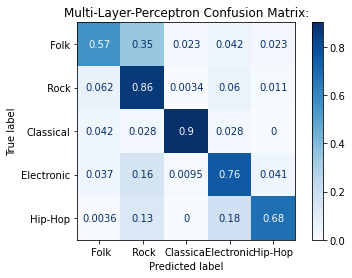

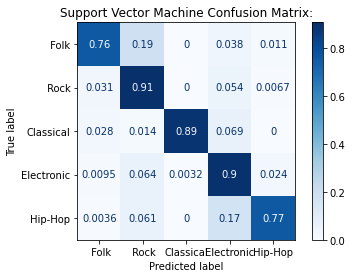

In [ ]:
# Confusion Matrix of the best classifiers.

# MLP
display_confusionMatrix(classifier_mlp, X_test, y_test, title_mlp)

# SVC
display_confusionMatrix(classifier_svc, X_test, y_test, title_svc)